# File to learn how to train nn models using pytorch

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

#### Data Preparing and Loading

Data can really be anyting
* Matrices
* Images
* Text 

The **first step** that we wanna do is convert the data into numerical format.

In [2]:
# A simple example to start with can be Linear Regression

# Making some data
Weight = 0.7
bias = 0.3

X = torch.arange(0,1,0.02).unsqueeze(dim = 1)

y = Weight*X + bias


#### Splitting the data into training and testing datasets

In [3]:
# Create a train test split

train_split = int(0.8*len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

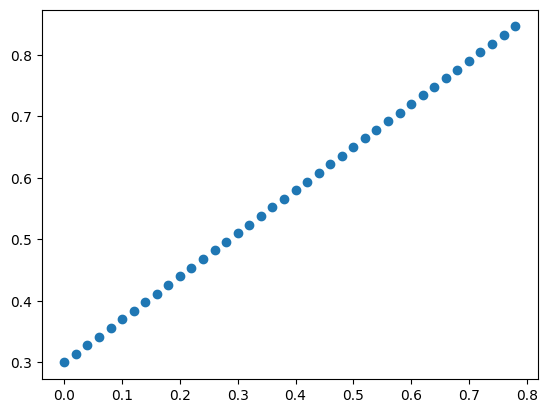

In [4]:
plt.plot(X_train, y_train, 'o')

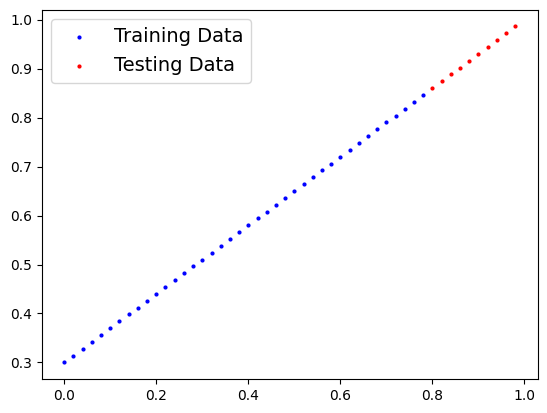

In [5]:
# Function  to plot all our ponts

def plot_predictions(x_train = X_train, 
                     y_train = y_train, 
                     x_test = X_test, 
                     y_test = y_test, 
                     predictions = None):
    plt.scatter(x_train, y_train , c = "b", s = 4, label = "Training Data")
    plt.scatter(x_test, y_test , c = "r", s = 4, label = "Testing Data")
    if predictions is not None:
        plt.scatter(x_test, predictions , c = "g", s = 4, label = "Prediction")
        
    plt.legend(prop = {"size":14})
        
plot_predictions()

#### Building the predictor model


In [6]:
# Create a linear regression model class

class LinearRegressionModel(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad = True,
                                                dtype = torch.float32))
        
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad= True,
                                             dtype=torch.float32))
        
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias
        

In [7]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

#### Making predictions using the model

In [8]:
# Make prediction with model
with torch.inference_mode():
    y_preds = model_0(X_test)
    
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

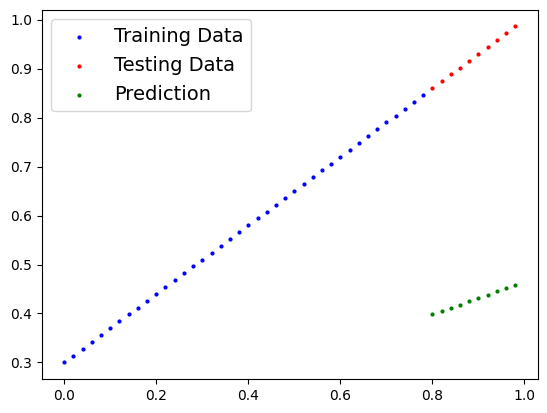

In [9]:
plot_predictions(predictions=y_preds)

#### Setup of a Loss Funciton and an Optimiser

In [10]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup of the optimiser
optimiser = torch.optim.SGD(
    params=model_0.parameters(),
    lr= 0.01 # learning Rate
)

#### Building a training loop in pytorch

In [13]:
# An epoch is one loop through the data 
epochs = 100

# Keep a track of some values
epoch_count = []
loss_values = []
test_loss_values = []


for epoch in range(epochs):
    model_0.train() # train mode in Pytorch required grad = true
    
    # 1. forward pass
    y_preds = model_0(X_train)
    
    # 2. Calculating loss
    loss = loss_fn(y_preds,y_train)
    
    # 3. optimize the zero grad
    optimiser.zero_grad()
    
    # 4. perform backprop on the loss wrt parameters of the model
    loss.backward()
    
    # 5.  Step the optimiser (perform gradient descent)
    optimiser.step() # by default accumulates 
    
    ### Testing
    model_0.eval() # turns off grad tracking the change through the loop
    with torch.inference_mode():
        # 1.do the forward pass
        test_pred = model_0(X_test)
        # calculate the loss
        test_loss = loss_fn(test_pred, y_test)
        
    # Print What is happeningn
    if epoch%10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
    

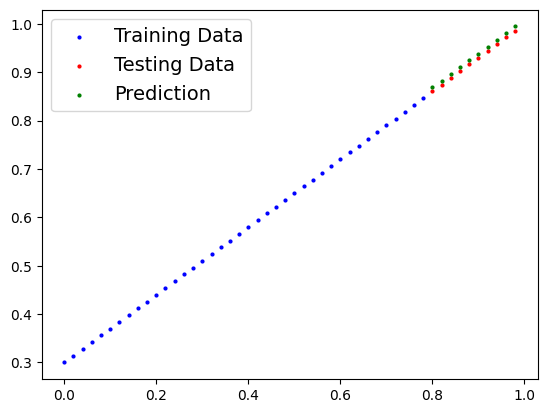

In [14]:
with torch.inference_mode():
    test_pred = model_0(X_test)
plot_predictions(predictions=test_pred)

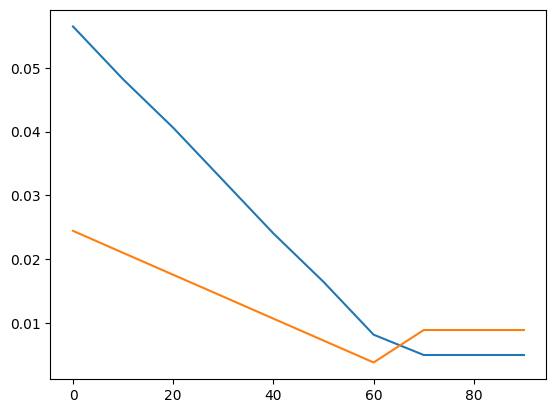

In [19]:
plt.plot(epoch_count, test_loss_values)

plt.plot(epoch_count, torch.tensor(loss_values).numpy())

#### Saving a model

**Saving and Loading Pytorch models has three main ways**

1. Torch.save
2. Torch.load
3. Torch.nn.Module.load_state_dict()

In [21]:
# Saving our model 
from pathlib import Path

# 1. Create a models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create a model save path
MODEL_NAME = "01_pytorchtut_Linearregression.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

MODEL_SAVE_PATH

# Save the model state_dict
torch.save(
    obj = model_0.state_dict(),
    f = MODEL_SAVE_PATH
)

#### Loading the model

In [24]:
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model.eval()
with torch.inference_mode():
    loaded_preds = loaded_model(X_test)
    
loaded_preds == test_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])